<a href="https://colab.research.google.com/github/githinjimary/DSI.2022/blob/main/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MARY NG'ENDO GITHINJI
github logins
USERNAME; githinjimary
PASSWORD; githinji13

Question 1

In [ ]:
import turtle

# colab turtle
!pip3 install ColabTurtle
from ColabTurtle.Turtle import *

# imports to make plots

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import numpy as np

In [ ]:
# initialize the turtle
initializeTurtle()

In [ ]:
# try:
#     t = turtle.Turtle()
# except:
#     t = turtle.Turtle()

In [ ]:
def drawPolygon(t, vertices):
    up()
    (x, y) = vertices[-1]
    goto(x, y)
    down()
    for (x, y) in vertices:
        goto(x, y)

In [ ]:
vertices = []
def drawHex():
    penup()
    goto(250,350)
    pendown()
    for _ in range(6):
      forward(225)
      right(360 / 6)
      vert = pos()
      vertices.append(vert)


drawHex()
print(vertices)

[(250.0, 125.0), (444.856, 12.5), (639.712, 125.0), (639.712, 350.0), (444.856, 462.5), (250.0, 350.0)]


In [ ]:
import random
#the function returns a random point

def random_point():
    pair_vertices = []
    num = random.randint(0,5)
    for i in range(len(vertices)):
        if i < len(vertices)-1:
            pair_vertices.append((vertices[i],vertices[i+1]))
    pair_vertices.append((vertices[-1],vertices[0]))
    return pair_vertices[num]

In [ ]:
# a random point within the hexagon
user_point = (500,200)

# a function returns three coordinates including the user point

def triangle_coordinates(cent):
    new_points = list(random_point())
    new_points.append(cent)
    return new_points

In [ ]:
# function to draw triangle with random inputs
points = []
def triangle(point):
    global points
    # it is used to draw out the pen
    penup()

    # it is used to move cursor at x
    # and y position
    goto(point)
    

    # it is used to draw in the pen
    pendown()
    point_tri = triangle_coordinates(point)
    points = point_tri
    
    for (w, z) in points:
        goto(w, z)
    
# special built in function to send current
# position of cursor to triangle

triangle(user_point)

In [ ]:
# centroid of the triangle

def getcentroid(coords):
    return tuple([sum(num)/3 for num in zip(*coords)])

centroid = getcentroid(points)
penup()
goto(centroid)

In [ ]:
# centroid as a random point of the triangle
triangle(centroid)

In [ ]:
# drawing 10 multiple centroids

for _ in range(100):
    centroid = getcentroid(points)
    penup()
    goto(centroid)
    
    triangle(centroid)

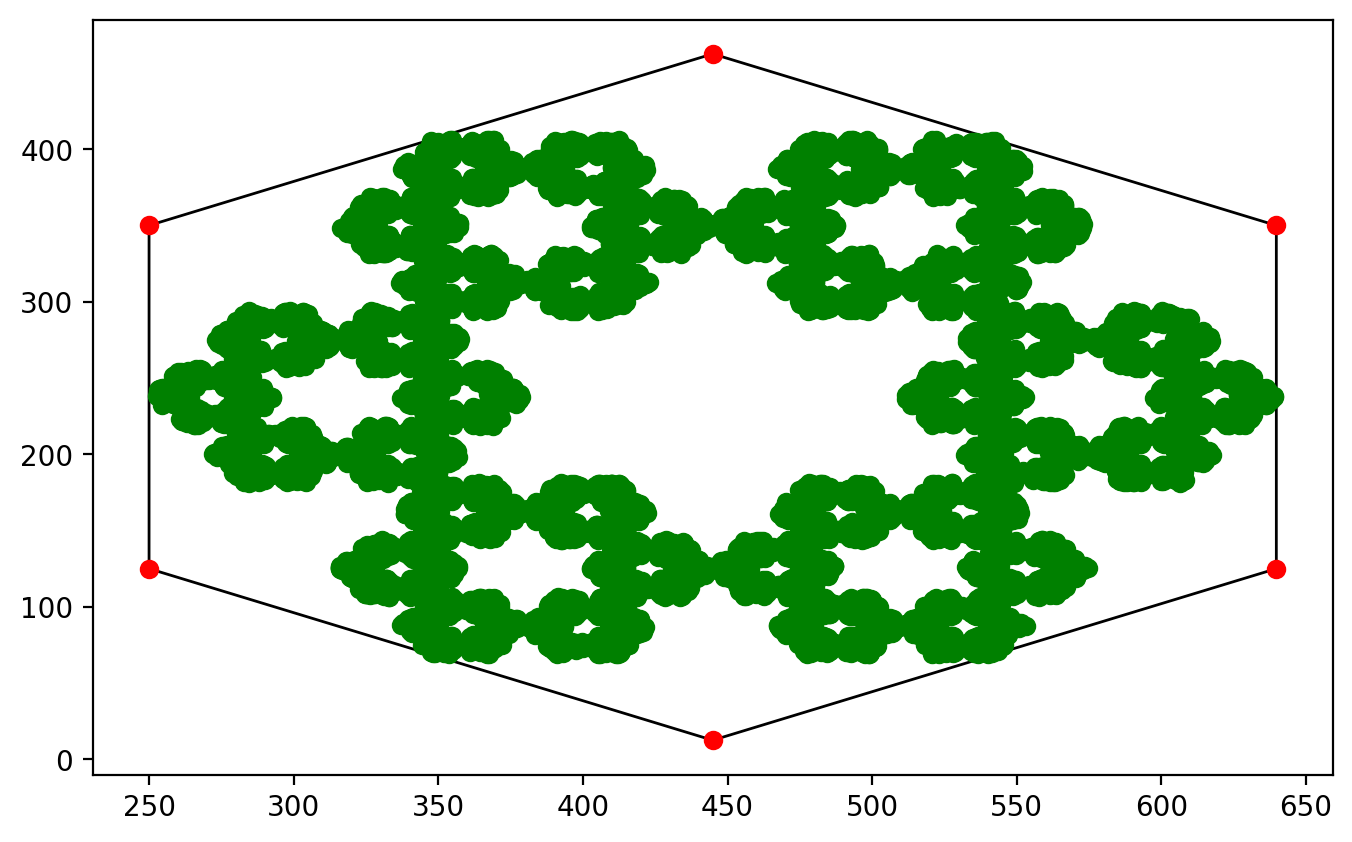

In [ ]:
# scatter plot of 10000 points

scatter_points = []
coordinates = points
for _ in range(10000):
    
    centroid = getcentroid(coordinates)
    point_tri = triangle_coordinates(centroid)
    coordinates = point_tri
    scatter_points.append(centroid)

hex  = Polygon(vertices,fill= False, closed =True)

plots = np.asarray(scatter_points)
vertices = np.asarray(vertices)

plt.figure(figsize = (8,5),dpi = 200)

plt.gca().add_patch(hex)
plt.plot(vertices[:,0],vertices[:,1],'ro')
plt.plot(plots[:,0],plots[:,1],'go')
plt.show()


Question 2

In [ ]:
# imports
import pandas as pd
import scipy

In [ ]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files_path = '/content/drive/MyDrive/DSI_Pre_Assignment_2022/'

# reading files
df0 = pd.read_csv(files_path+"title.akas.tsv.gz",compression='gzip',sep = '\t',low_memory = False)
df1 = pd.read_csv(files_path+"title.basics.tsv.gz",compression='gzip',sep = '\t',low_memory = False)
df2 = pd.read_csv(files_path+"title.ratings.tsv.gz",compression='gzip',sep = '\t',low_memory = False)

In [ ]:
df0.shape

(3423660, 8)

In [ ]:
df0.columns

Index(['titleId', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [ ]:
df0.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [ ]:
df1.shape

(5330276, 9)

In [ ]:
df1.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [ ]:
df1.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [ ]:
df2.shape

(874203, 3)

In [ ]:
df2.columns

Index(['tconst', 'averageRating', 'numVotes'], dtype='object')

In [ ]:
# question 2
df0.drop_duplicates(inplace=True)
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [ ]:
# inner merge
df_inner_1 = df0.merge(df1, how='inner', left_on='titleId', right_on='tconst')
df_inner = df_inner_1.merge(df2, how='inner', on='tconst')

In [ ]:
# outer merge
df_outer_1 = df0.merge(df1, how='outer', left_on='titleId', right_on='tconst')
df_outer = df_outer_1.merge(df2, how='outer', on='tconst')

In [ ]:
print(f'The shape of inner merge is {df_inner.shape} and  outer merge is {df_outer.shape}')

The shape of inner merge is (1686547, 19) and  outer merge is (6740089, 19)


In [ ]:
# unique method
titleTypes = df_outer['titleType'].unique()
titleTypes

array(['short', 'movie', nan, 'tvMovie', 'tvSeries', 'tvEpisode',
       'tvShort', 'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'],
      dtype=object)

In [ ]:
# question 4
region = df_outer['region'] == 'US'
movie = df_outer['titleType'] == 'movie'
language = df_outer['language'] == 'en'

df_new = df_outer[language | region & movie]

df_new.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
51,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0
74,tt0000012,11.0,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0
76,tt0000012,13.0,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0
85,tt0000012,21.0,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0
131,tt0000016,1.0,Boat Leaving the Port,XWW,en,\N,informal title,0,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"Documentary,Short",5.9,967.0


In [ ]:
# questions 5

df_new['log10Votes'] = df_new['numVotes'].apply(lambda x: np.log10(x))

df_new.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
51,tt0000009,3.0,Miss Jerry,US,\N,\N,\N,0,tt0000009,movie,Miss Jerry,Miss Jerry,0.0,1894,\N,45,Romance,5.5,70.0,1.845098
74,tt0000012,11.0,The Arrival of a Train,XWW,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,3.929879
76,tt0000012,13.0,The Arrival of a Train at La Ciotat,XWW,en,alternative,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,3.929879
85,tt0000012,21.0,The Arrival of a Train,XEU,en,imdbDisplay,\N,0,tt0000012,short,The Arrival of a Train,L'arrivée d'un train à La Ciotat,0.0,1896,\N,1,"Documentary,Short",7.4,8509.0,3.929879
131,tt0000016,1.0,Boat Leaving the Port,XWW,en,\N,informal title,0,tt0000016,short,Barque sortant du port,Barque sortant du port,0.0,1895,\N,1,"Documentary,Short",5.9,967.0,2.985426


In [ ]:

df_new["genres"].str.lower()

51                   romance
74         documentary,short
76         documentary,short
85         documentary,short
131        documentary,short
                 ...        
3423618          documentary
3423633       comedy,romance
3423637          documentary
3423641                short
3423645                short
Name: genres, Length: 309870, dtype: object

In [ ]:
group_genre = df_new.groupby('genres')

# top genres by logvotes 

group_log = group_genre['log10Votes'].mean().sort_values(ascending = False).head(10)
avg_rating = group_genre['averageRating'].mean().sort_values(ascending = False).head(10)
group_log

genres
Action,Fantasy,War            5.405722
Action,Family,Romance         4.801753
Family,Music,Musical          4.396252
Documentary,Sport,Thriller    4.386731
Horror,Musical,Sci-Fi         4.340484
Biography,Fantasy,Horror      4.271842
Animation,Drama,War           4.137558
Comedy,Crime,Sport            4.112184
Action,Adventure,Sci-Fi       4.064078
Adventure,Drama,Sci-Fi        4.033407
Name: log10Votes, dtype: float64

In [ ]:
# top genres based on avg rating
avg_rating

genres
Documentary,History,Western    9.300000
History,Sport                  9.200000
Documentary,News,Reality-TV    9.150000
Action,Musical,Short           9.100000
Action,Fantasy,Short           9.000000
Biography,Comedy,Sci-Fi        9.000000
Crime,Reality-TV               8.966667
Comedy,Reality-TV,Talk-Show    8.800000
Short,Thriller,War             8.700000
Action,Biography,Short         8.600000
Name: averageRating, dtype: float64

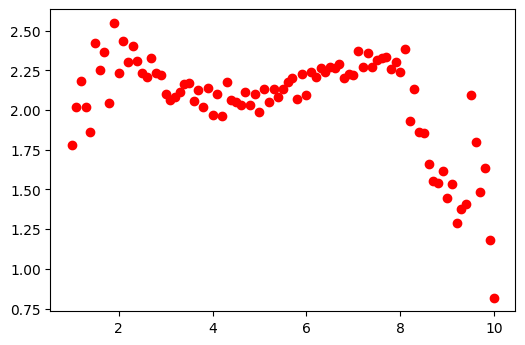

In [ ]:
group_avg = df_new.groupby('averageRating').mean()

plt.figure(figsize=(6,4),dpi = 100)
plt.scatter(x = group_avg.index, y = group_avg['log10Votes'],color = 'red')

In [ ]:
#using sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# obtain the x and y values from the groupby dataframe
x = group_avg.index.values
X = x.reshape(-1,1)
y = group_avg['log10Votes'].values
y_train = y


reg = LinearRegression().fit(X, y)
# slope of reg line
coef = reg.coef_

# intercept of the regression line

intercept_ = reg.intercept_
print('Score: {} Intercept: {} Slope: {}'.format(reg.score(X, y),intercept_,coef[0]))

Score: 0.26321208475337476 Intercept: 2.387452274629761 Slope: -0.059545493225700595


In [ ]:
# scipy
from scipy.stats import linregress

R-squared: 0.263212 Intercept: 2.387452274629761 and slope: -0.05954549322570058


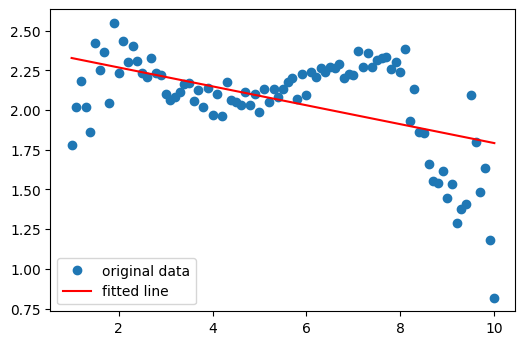

In [ ]:
res = linregress(x, y)

# coeffiecient of determination

print(f"R-squared: {res.rvalue**2:.6f} Intercept: {res.intercept} and slope: {res.slope}")

# plots of the fitted line

plt.figure(figsize=(6,4),dpi = 100)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


In [ ]:
# Pytorch
import torch
import torch.nn as nn

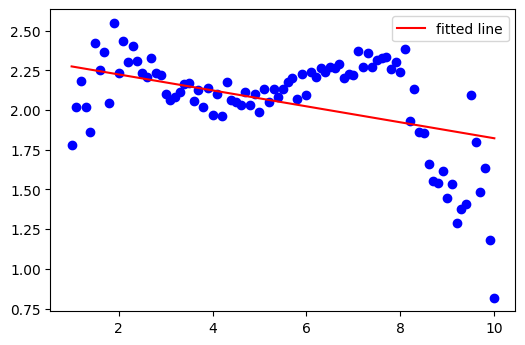

In [ ]:
# inherit values from previous X and Y
y = y_train
X = torch.from_numpy(x.reshape(-1,1).astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))
y = y.view(y.shape[0], 1)
# samples

n_samples, n_features = X.shape


# initializing the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)
learning_rate = 0.01

# Loss criterion
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# training with 1000 epochs

num_epochs = 1000
for epoch in range(num_epochs):
  
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    loss.backward()
    optimizer.step()

    optimizer.zero_grad()


# make plots

predicted = model(X).detach().numpy()

plt.figure(figsize=(6,4),dpi = 100)
plt.plot(X, y, 'bo')
plt.plot(X, predicted, 'r', label='fitted line')
plt.legend()
plt.show()

*Training the model for a thousand epochs, provides similar results as for the Scipy and Sk Learn*